In [1]:
import numpy as np 
import pandas as pd 

/kaggle/input/fuel-data/MOPS hist.csv


In [2]:
df = pd.read_csv('/kaggle/input/fuel-data/MOPS hist.csv')

In [3]:
import calendar

import statsmodels.api as sm

import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/fuel-data/MOPS hist.csv')

!pip install prophet

from prophet import Prophet

!pip install fbprophet

!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 59.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [42 lines of output]
      /tmp/pip-install-oacgt4ap/fbprophet_d897b653c716436187a3e0b25f7c19d0/setup.py:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        from pkg_resources import (
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-oacgt4ap/fbprophet_d897b653c716436187a3e0b25f7c19d0/setup.py", line 122

In [4]:
df['Date'] = df['Month'].apply(lambda x: calendar.month_name[x]) + ' ' + df['Year'].astype(str)

data = df[['Date','MOPS']]

df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace = True)


/tmp/ipykernel_20/721785659.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [5]:
df

,Month,Year,MOPS
Date,,,
2002-01-01,1,2002,17.482999
2002-02-01,2,2002,18.539833
2002-03-01,3,2002,21.078740
2002-04-01,4,2002,23.339299
2002-05-01,5,2002,24.595988
...,...,...,...
2023-02-01,2,2023,60.372800
2023-03-01,3,2023,62.737700
2023-04-01,4,2023,66.013700


In [6]:
df['Volatility'] = np.log((df['MOPS'])/(df['MOPS'].shift(1)))

df.isna().sum()

df.dropna(inplace = True)

df.isna().sum()

Month         0
Year          0
MOPS          0
Volatility    0
dtype: int64

<Axes: xlabel='Date'>

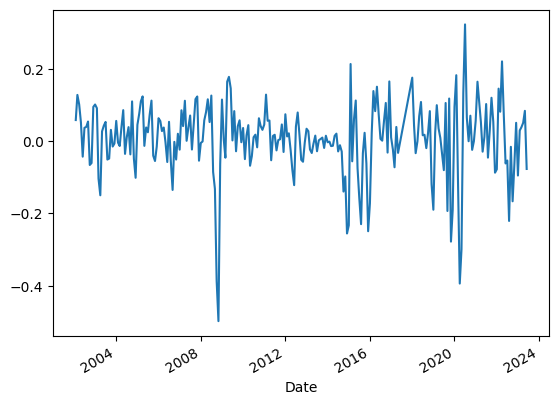

In [7]:
df['Volatility'].plot()

In [8]:
from arch import arch_model

model = arch_model(df['Volatility'], vol = 'Garch', p =1, q=1)

model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6842828.558916865
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3783.792544026751
Iteration:      3,   Func. Count:     22,   Neg. LLF: -253.4133260065285
Iteration:      4,   Func. Count:     28,   Neg. LLF: -266.2729002458283
Iteration:      5,   Func. Count:     34,   Neg. LLF: -139.05733510685954
Iteration:      6,   Func. Count:     41,   Neg. LLF: -271.0847058832401
Iteration:      7,   Func. Count:     46,   Neg. LLF: -263.01853303279546
Iteration:      8,   Func. Count:     52,   Neg. LLF: -270.6030874180051
Iteration:      9,   Func. Count:     58,   Neg. LLF: -271.6167510157582
Iteration:     10,   Func. Count:     63,   Neg. LLF: -271.6521594507927
Iteration:     11,   Func. Count:     68,   Neg. LLF: -271.6544481786859
Iteration:     12,   Func. Count:     73,   Neg. LLF: -271.65453311500596
Iteration:     13,   Func. Count:     77,   Neg. LLF: -271.65453321165285
Optimization terminated successfully    (Exit mod

/opt/conda/lib/python3.10/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01011. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


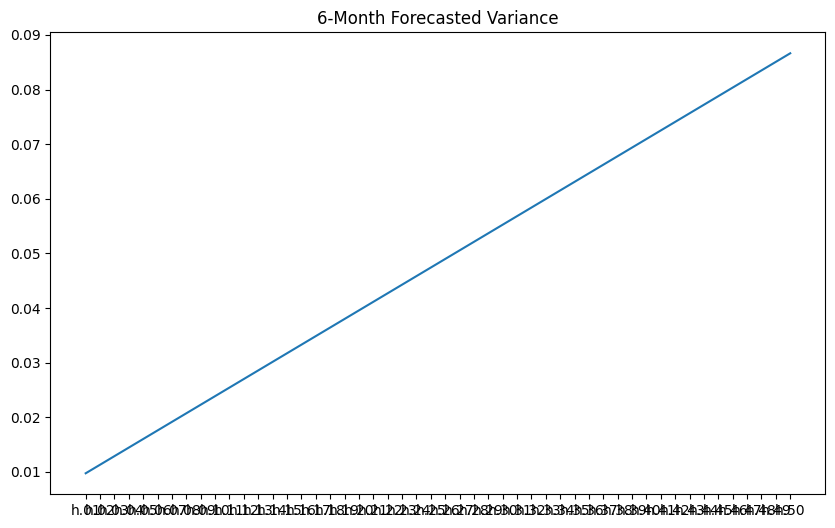

In [9]:
forecast =  model_fit.forecast(start = 0, horizon = 50)
forecasted_variance = forecast.variance[-1:]
plt.figure(figsize=(10,6))
plt.plot(forecasted_variance.T
        )
plt.title('50 Day Forecast Variance')
plt.show()
